### <caenter> Подготовительная часть для выполнения практического задания

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array(
    [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
    ]
)

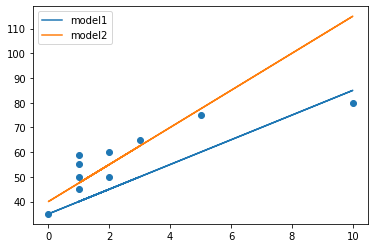

In [3]:
plt.scatter(X[1], y)
plt.plot(X[1], 35 * X[0] + X[1] * 5, label='model1')
plt.plot(X[1], 40 * X[0] + X[1] * 7.5, label='model2')
plt.legend(loc='best')
plt.show()

In [4]:
y_pred1 = np.ones(10) * 35 + X[1] * 5
y_pred2 = np.ones(10) * 40 + X[1] * 7.5

In [5]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [6]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

$\displaystyle MAE = \frac{1}{l} \sum_{i=1}^{l}|y_{i}-\hat{y_i}|$  
$\displaystyle MSE = \frac{1}{l} \sum_{i=1}^{l}(y_{i}-\hat{y_i})^2$

In [7]:
mae_1 = np.mean(np.abs(y_pred1 - y))
mae_2 = np.mean(np.abs(y_pred2 - y))

In [8]:
mae_1, mae_2

(10.4, 7.9)

In [9]:
mse_1 = np.mean((y_pred1 - y) ** 2)
mse_2 = np.mean((y_pred2 - y) ** 2)

In [10]:
mse_1, mse_2

(143.6, 151.35)

$MAE_1>MAE_2$ но $MSE_1<MSE_2$
Выбор метрики:
 * $MSE$ - в случае, если есть выбросы, и они имеют значение при работе модели
 * $MAE$ - в случае, если выбросы не важны, модель должна хорошо работать на большинстве моделей

Аналитический метод нахождения вектора весов в модели линейной регрессии:
$w=(X^{T}\cdot X)^{-1}\cdot X^{T}\cdot Y$

Реализация:

In [11]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0
# отличается от классического вида, поскольку у нас изначально массив
# Х представляет собой транспонированную матрицу
# для приведения к классическому виду необходимо изначально
# задавать вектор признаков и вектор значений в иной размерности
# код ниже

array([47.23214286,  3.91071429])

In [12]:
X1 = X.swapaxes(0, 1)
y1 = y.reshape((len(y), -1))
W1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y1
W1

array([[47.23214286],
       [ 3.91071429]])

In [13]:
# ковариационная матрица
np.dot(X, X.T)
#np.dot(X1.T,X1)

array([[ 10,  26],
       [ 26, 146]])

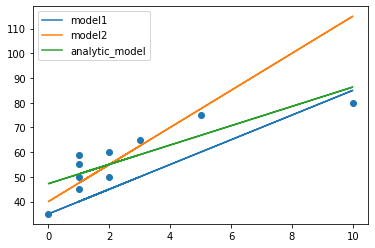

In [14]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.legend(loc='best')
plt.show()

In [15]:
y_pred3 = W_0[0] + W_0[1] * X[1]

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [18]:
calc_mae(y, y_pred1), calc_mae(y, y_pred2), calc_mae(y, y_pred3)

(10.4, 7.9, 6.182142857142859)

In [19]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)


(143.6, 151.35, 45.93750000000002)

Аналитическая формула имеет недостатки использования при вычислении весов линейной
модели в следствии того, что вычисление обратной матрицы при большом количестве признаков
имеет высокую вычислительную сложность.

## <center> Практическое задание

**1. Подберите скорость обучения($\alpha$) и количество итераций:**

In [20]:
n = X.shape[1]
alpha = 1e-04

W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [21]:
for i in range(1500):
    y_pred = W @ X
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796256
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178
1000 [ 7.38906894 10.68706909] 900.0794345405571
1100 [ 7.82719761 10.75762786] 880.3560305497828
1200 [ 8.25402271 10.7907869 ] 862.0105344693482
1300 [ 8.67142649 10.79649311] 844.5738572427321
1400 [ 9.08081151 10.78209811] 827.7864098809556


Решение:

In [22]:
def grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    '''

    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse
    '''
    n = X.shape[1]
    W = np.array([1, 0.5])  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [23]:
W_1, mse_1 = grad_desc(X, y, alpha=0.06, verbose=True)
W_1, mse_1

100 [47.16186867  3.92369094] 45.94052007431746
200 [47.23203087  3.91073496] 45.937500007669335
Stop descent! iteration: 283, weights: [47.23214229  3.91071439], mse: 45.93750000000017


(array([47.23214232,  3.91071438]), 45.93750000000017)

при $\alpha = 0.06$ максимально приблизились к минимуму за $287$ итераций.

Визуализируем на графике:

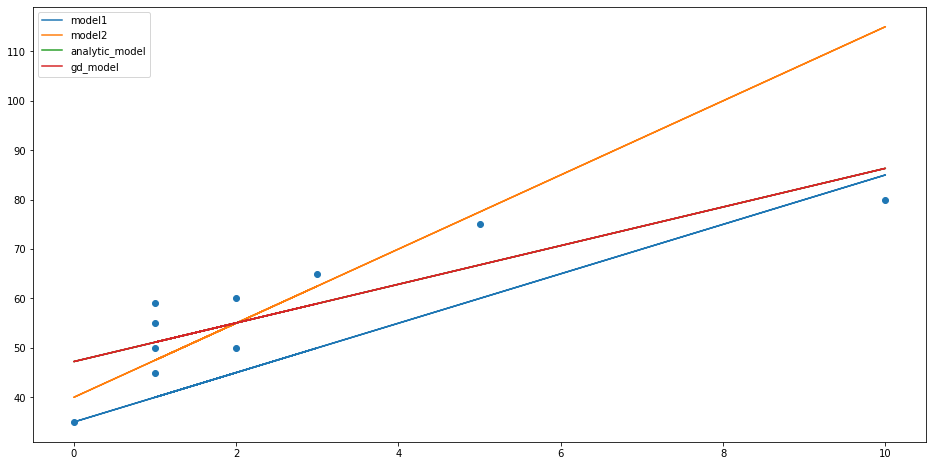

In [24]:
plt.figure(figsize=(16, 8))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.plot(X[1], W_1[0] + W_1[1] * X[1], label='gd_model')
plt.legend(loc='best')
plt.show()

Видим, что линия регрессии полученная аналитическим методом, и методом градиентного спуска перекрывают друг друга.

**2\*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [25]:
n = X.shape[1]
alpha = 0.06 # будем использовать подобранные нами значения alpha и оптимальное количество итераций

W = np.array([1, 0.5])

for i in range(287):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # for ii in range(W.shape[0]):
    # W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1 / n * 2 * np.sum(X * (y_pred - y))))
    if i % 10 == 0:
        print(i, W, err)


0 [28.012 27.512] 3173.15
10 [920.8133364 920.3133364] 7679999.809125753
20 [51047.7040571 51047.2040571] 24207581874.947388
30 [2865453.40763741 2865452.90763741] 76310318597570.66
40 [1.60882026e+08 1.60882025e+08] 2.4055541490033075e+17
50 [9.03282155e+09 9.03282155e+09] 7.583103923808137e+20
60 [5.07153428e+11 5.07153428e+11] 2.3904456751929813e+24
70 [2.84744471e+13 2.84744471e+13] 7.535477007124038e+27
80 [1.59871568e+15 1.59871568e+15] 2.3754320926080286e+31
90 [8.97608944e+16 8.97608944e+16] 7.488149219030976e+34
100 [5.03968168e+18 5.03968168e+18] 2.360512805268678e+38
110 [2.82956087e+20 2.82956087e+20] 7.441118680803292e+41
120 [1.58867469e+22 1.58867469e+22] 2.3456872209383065e+45
130 [8.91971365e+23 8.91971365e+23] 7.394383525514864e+48
140 [5.00802914e+25 5.00802914e+25] 2.3309547510999388e+52
150 [2.81178936e+27 2.81178936e+27] 7.347941897965165e+55
160 [1.57869676e+29 1.57869676e+29] 2.3163148109328867e+59
170 [8.86369194e+30 8.86369194e+30] 7.30179195460546e+62
180 [4.

Решение:

In [26]:
n = X.shape[1]
alpha = 0.06

W = np.array([1, 0.5])

for i in range(287):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # for ii in range(W.shape[0]):
    # W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1))) # установим параметр axis=1 в функции np.sum()
    if i % 10 == 0:
        print(i, W, err)

0 [ 7.612 20.9  ] 3173.15
10 [25.72983979  9.05170097] 364.6834436471202
20 [35.85695572  6.15284752] 125.86627725452956
30 [41.24888118  5.03270471] 67.85926616474049
40 [44.0891315   4.49316871] 51.98014546835954
50 [45.5816168   4.21574742] 47.603575735386116
60 [46.3654434   4.07078732] 46.39687623882493
70 [46.77704197  3.99475582] 46.064160921425916
80 [46.99317184  3.95484256] 45.972423420722386
90 [47.10666058  3.9338856 ] 45.94712921557662
100 [47.16625286  3.92288138] 45.94015500316733
110 [47.19754441  3.91710315] 45.9382320473576
120 [47.21397542  3.91406904] 45.93770184282278
130 [47.22260325  3.91247585] 45.93755565285452
140 [47.22713366  3.91163927] 45.93751534481224
150 [47.22951256  3.91119999] 45.937504230928766
160 [47.2307617   3.91096933] 45.93750116656742
170 [47.23141762  3.91084821] 45.937500321650326
180 [47.23176204  3.91078461] 45.93750008868662
190 [47.23194289  3.91075121] 45.937500024453016
200 [47.23203786  3.91073367] 45.937500006742276
210 [47.23208772

На основании решения задач, функция градиентного спуска примет окончательный вид:

In [27]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse
    
    '''
    n = X.shape[1]
    W = np.array([1, 0.5])  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [28]:
W_1, mse_1 = my_grad_desc(X, y, alpha=0.06, verbose=True)
W_1, mse_1

100 [47.16186867  3.92369094] 45.94052007431746
200 [47.23203087  3.91073496] 45.937500007669335
Stop descent! iteration: 283, weights: [47.23214229  3.91071439], mse: 45.93750000000017


(array([47.23214232,  3.91071438]), 45.93750000000017)